In [125]:
import pickle
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('..')
from utils.util import *
sns.set_theme()
sns.set_style("whitegrid") #  {darkgrid, whitegrid, dark, white, ticks}
sns.set_context("talk")
# sns.set_context("paper")

In [127]:
analyze_name1 = 'calc_ratio'
analyze_name2 = 'analyze_accs'

## Read Ratio Results

In [213]:
analyze_name = analyze_name1

with open('../../results/%s_results_mlp.P' %(analyze_name), 'rb') as f:
    mlp_results = pickle.load(f)
# ----------------------
lesion_p = 0.1
# ----------------------
with open('../../results/%s_results_mlp_lesionp0.1.P' %(analyze_name), 'rb') as f:
    mlplesion_results = pickle.load(f)
# ----------------------
ctx_order = 'first'
ctx_order_str = 'ctxF'
# ----------------------
with open('../../results/%s_%s_results_rnn.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnn_lesionp%s.P' %(analyze_name, ctx_order_str, lesion_p), 'rb') as f:
    rnnlesion_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnncell.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnn_balanced.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnnb_results_ctxF = pickle.load(f)
# ----------------------
ctx_order = 'last'
ctx_order_str = 'ctxL'
# ----------------------
with open('../../results/%s_%s_results_rnn.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnn_lesionp%s.P' %(analyze_name, ctx_order_str, lesion_p), 'rb') as f:
    rnnlesion_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnncell.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnn_balanced.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnnb_results_ctxL = pickle.load(f)
# ----------------------
with open('../../results/%s_results_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_results = pickle.load(f)

with open('../../results/%s_results_truncated_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_trunc_results = pickle.load(f)
# ----------------------
with open('../../results/%s_results_mlp_cc.P' %(analyze_name), 'rb') as f:
    mlpcc_results = pickle.load(f)

In [214]:
mlp_runs             = dict_to_list(mlp_results, analyze_name)
mlplesion_runs       = dict_to_list(mlplesion_results, analyze_name)
rnn_runs_ctxF        = dict_to_list(rnn_results_ctxF, analyze_name)
rnncell_runs_ctxF    = dict_to_list(rnncell_results_ctxF, analyze_name)
rnnb_runs_ctxF       = dict_to_list(rnnb_results_ctxF, analyze_name)
rnnlesion_runs_ctxF = dict_to_list(rnnlesion_results_ctxF, analyze_name)
rnn_runs_ctxL        = dict_to_list(rnn_results_ctxL, analyze_name)
rnncell_runs_ctxL    = dict_to_list(rnncell_results_ctxL, analyze_name)
rnnb_runs_ctxL       = dict_to_list(rnnb_results_ctxL, analyze_name)
rnnlesion_runs_ctxL = dict_to_list(rnnlesion_results_ctxL, analyze_name)
swmlp_runs           = dict_to_list(swmlp_results, analyze_name)
mlpcc_runs           = dict_to_list(mlpcc_results, analyze_name)
mlp_runs.keys()

dict_keys(['ratio_embed', 'ratio_hidd'])

In [215]:
val_str = 'ratio_hidd'
ratio_hidds_mlp       = np.asarray(mlp_runs[val_str])
ratio_hidds_mlplesion = np.asarray(mlplesion_runs[val_str])

ratio_hidds_rnn_ctxF       = np.asarray(rnn_runs_ctxF[val_str])
ratio_hidds_rnncell_ctxF   = np.asarray(rnncell_runs_ctxF[val_str])
ratio_hidds_rnnb_ctxF   = np.asarray(rnnb_runs_ctxF[val_str])
ratio_hidds_rnnlesion_ctxF   = np.asarray(rnnlesion_runs_ctxF[val_str])

ratio_hidds_rnn_ctxL       = np.asarray(rnn_runs_ctxL[val_str])
ratio_hidds_rnncell_ctxL   = np.asarray(rnncell_runs_ctxL[val_str])
ratio_hidds_rnnb_ctxL   = np.asarray(rnnb_runs_ctxL[val_str])
ratio_hidds_rnnlesion_ctxL   = np.asarray(rnnlesion_runs_ctxL[val_str])

ratio_hidds_swmlp     = np.asarray(swmlp_runs[val_str])
ratio_hidds_mlpcc     = np.asarray(mlpcc_runs[val_str])

ratio_hidds_swmlp.shape

(20, 21, 2)

## Read ACC Ratio(cong/incong) results

In [217]:
analyze_name = analyze_name2

with open('../../results/%s_results_mlp.P' %(analyze_name), 'rb') as f:
    mlp_results = pickle.load(f)
# ----------------------
lesion_p = 0.1
# ----------------------
with open('../../results/%s_results_mlp_lesionp0.1.P' %(analyze_name), 'rb') as f:
    mlplesion_results = pickle.load(f)
# ----------------------
ctx_order = 'first'
ctx_order_str = 'ctxF'
# ----------------------
with open('../../results/%s_%s_results_rnn_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnn_lesionp%s.P' %(analyze_name, ctx_order_str, lesion_p), 'rb') as f:
    rnnlesion_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnn_balanced.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnnb_results_ctxF = pickle.load(f)
# ----------------------
ctx_order = 'last'
ctx_order_str = 'ctxL'
# ----------------------
with open('../../results/%s_%s_results_rnn_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnn_lesionp%s.P' %(analyze_name, ctx_order_str, lesion_p), 'rb') as f:
    rnnlesion_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnn_balanced.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnnb_results_ctxL = pickle.load(f)
# ----------------------
with open('../../results/%s_results_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_results = pickle.load(f)

with open('../../results/%s_results_truncated_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_trunc_results = pickle.load(f)
# ----------------------
with open('../../results/%s_results_mlp_cc.P' %(analyze_name), 'rb') as f:
    mlpcc_results = pickle.load(f)

In [218]:
mlp_acc_runs             = dict_to_list(mlp_results, analyze_name)
mlplesion_acc_runs       = dict_to_list(mlplesion_results, analyze_name)
rnn_acc_runs_ctxF        = dict_to_list(rnn_results_ctxF, analyze_name)
rnncell_acc_runs_ctxF    = dict_to_list(rnncell_results_ctxF, analyze_name)
rnnb_acc_runs_ctxF       = dict_to_list(rnnb_results_ctxF, analyze_name)
rnnlesion_acc_runs_ctxF = dict_to_list(rnnlesion_results_ctxF, analyze_name)
rnn_acc_runs_ctxL        = dict_to_list(rnn_results_ctxL, analyze_name)
rnncell_acc_runs_ctxL    = dict_to_list(rnncell_results_ctxL, analyze_name)
rnnb_acc_runs_ctxL       = dict_to_list(rnnb_results_ctxL, analyze_name)
rnnlesion_acc_runs_ctxL = dict_to_list(rnnlesion_results_ctxL, analyze_name)
swmlp_acc_runs           = dict_to_list(swmlp_results, analyze_name)
mlpcc_acc_runs           = dict_to_list(mlpcc_results, analyze_name)
mlp_acc_runs.keys()

dict_keys(['train_acc', 'test_acc', 'cong_train_acc', 'incong_train_acc', 'cong_test_acc', 'incong_test_acc'])

In [219]:
def runs_to_df(runs_result, ratio_hidds):
        cong_train_accs, cong_test_accs = np.asarray(runs_result['cong_train_acc']), \
                                        np.asarray(runs_result['cong_test_acc'])
        incong_train_accs, incong_test_accs = np.asarray(runs_result['incong_train_acc']), \
                                                np.asarray(runs_result['incong_test_acc'])
        train_accs, test_accs = np.asarray(runs_result['train_acc']), np.asarray(runs_result['test_acc'])
        ratio_cong_incong_train = cong_train_accs / incong_train_accs
        ratio_cong_incong_test = cong_test_accs / incong_test_accs

        runs, checkpoints = train_accs.shape

        ratio_hidd = pd.DataFrame(ratio_hidds, columns=np.arange(checkpoints)) 
        ratio_hidd.insert(0, 'runs', np.arange(runs))
        df_ratio_hidds = pd.melt(ratio_hidd, id_vars=['runs'], var_name='steps', value_name='Ratio(cong/incong)')
        df_ratio_hidds['Label'] = 'ratio_dist_hidds'

        ratio_tr = pd.DataFrame(ratio_cong_incong_train, columns=np.arange(checkpoints)) 
        ratio_tr.insert(0, 'runs', np.arange(runs))
        df_ratio_cong_incong_acc_tr = pd.melt(ratio_tr, id_vars=['runs'], var_name='steps', value_name='Ratio(cong/incong)')
        df_ratio_cong_incong_acc_tr['Label'] = 'ratio_accs_train'

        ratio_ts = pd.DataFrame(ratio_cong_incong_test, columns=np.arange(checkpoints)) 
        ratio_ts.insert(0, 'runs', np.arange(runs))
        df_ratio_cong_incong_acc_ts = pd.melt(ratio_ts, id_vars=['runs'], var_name='steps', value_name='Ratio(cong/incong)')
        df_ratio_cong_incong_acc_ts['Label'] = 'ratio_accs_test'

        tr = pd.DataFrame(train_accs, columns=np.arange(checkpoints)) 
        tr.insert(0, 'runs', np.arange(runs))
        df_train = pd.melt(tr, id_vars=['runs'], var_name='steps', value_name='Ratio(cong/incong)')
        df_train['Label'] = 'train'

        ts = pd.DataFrame(test_accs, columns=np.arange(checkpoints)) 
        ts.insert(0, 'runs', np.arange(runs))
        df_test = pd.melt(ts, id_vars=['runs'], var_name='steps', value_name='Ratio(cong/incong)')
        df_test['Label'] = 'test'

        cong_tr = pd.DataFrame(cong_train_accs, columns=np.arange(checkpoints)) 
        cong_tr.insert(0, 'runs', np.arange(runs))
        df_cong_train = pd.melt(cong_tr, id_vars=['runs'], var_name='steps', value_name='Ratio(cong/incong)')
        df_cong_train['Label'] = 'cong_train'

        cong_ts = pd.DataFrame(cong_test_accs, columns=np.arange(checkpoints)) 
        cong_ts.insert(0, 'runs', np.arange(runs))
        df_cong_test = pd.melt(cong_ts, id_vars=['runs'], var_name='steps', value_name='Ratio(cong/incong)')
        df_cong_test['Label'] = 'cong_test'

        incong_tr = pd.DataFrame(incong_train_accs, columns=np.arange(checkpoints)) 
        incong_tr.insert(0, 'runs', np.arange(runs))
        df_incong_train = pd.melt(incong_tr, id_vars=['runs'], var_name='steps', value_name='Ratio(cong/incong)')
        df_incong_train['Label'] = 'incong_train'

        incong_ts = pd.DataFrame(incong_test_accs, columns=np.arange(checkpoints)) 
        incong_ts.insert(0, 'runs', np.arange(runs))
        df_incong_test = pd.melt(incong_ts, id_vars=['runs'], var_name='steps', value_name='Ratio(cong/incong)')
        df_incong_test['Label'] = 'incong_test'

        dfs = df_train, df_test, df_cong_train, df_cong_test, df_incong_train,\
                df_incong_test, df_ratio_cong_incong_acc_tr, df_ratio_cong_incong_acc_ts, \
                df_ratio_hidds
        return dfs


def plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax):
        # mi, mx = 1, 2.5
        threshold = 1
        val_name = "Ratio(cong/incong)"
        df_train, df_test, df_cong_train,\
        df_cong_test, df_incong_train,\
        df_incong_test, df_ratio_cong_incong_acc_tr,\
        df_ratio_cong_incong_acc_ts, df_ratio_hidds = dfs
        # ax = sns.lineplot(data=df_train,
        #             x="steps", y=val_name, hue="Label", style="Label",
        #             markers=True, dashes=False, err_style="bars", ci=68, palette=['darkblue'], ax=ax)
        # ax = sns.lineplot(data=df_test,
        #             x="steps", y=val_name, hue="Label", style="Label",
        #             markers=True, dashes=False, err_style="bars", ci=68, ax=ax)
        if is_bar_plot:
                ax = sns.boxplot(data=df_ratio_hidds, 
                                x='steps', y=val_name, ax=ax)
                ax = sns.stripplot(data=df_ratio_hidds, 
                                x='steps', y=val_name, ax=ax)
        else:
                ax = sns.lineplot(data=df_ratio_hidds,
                                x="steps", y=val_name, hue="Label", style="Label",
                                markers=True, dashes=False, err_style="bars", ci=68, palette=['green'], ax=ax)
        if is_accs_plot:
                ax = sns.lineplot(data=df_ratio_cong_incong_acc_tr,
                                x="steps", y=val_name, hue="Label", style="Label",
                                markers=True, dashes=False, err_style="bars", ci=68, palette=['darkblue'], ax=ax)
                        
        # ax = sns.lineplot(data=df_ratio_cong_incong_acc_ts,
        #             x="steps", y=val_name, hue="Label", style="Label",
        #             markers=True, dashes=False, err_style="bars", ci=68, palette=['red'], ax=ax)
        # ax = sns.lineplot(data=df_incong_train,
        #             x="steps", y=val_name, hue="Label", style="Label",
        #             markers=True, dashes=False, err_style="bars", ci=68, palette=['green'], ax=ax)
        # ax = sns.lineplot(data=df_incong_test,
        #             x="steps", y=val_name, hue="Label", style="Label",
        #             markers=True, dashes=False, err_style="bars", ci=68, palette=['purple'], ax=ax)
        ax.set_ylim([mi, mx])
        ax.set_title(sub_title)
        if ctx_order is not None:
                fig.suptitle('Ratio Results - %s - Ax %s' %(model_str, ctx_order), fontweight='bold', fontsize='25')
        else:
                fig.suptitle('Ratio Results - %s' %(model_str), fontweight='bold', fontsize='25')
        plt.tight_layout()
        fig_str = '%s_ratio_wacc_results_%s_hidds' %(ctx_order_str, mfig_str)
        fig.savefig(('../../figures/' + fig_str + '.pdf'), 
                bbox_inches = 'tight', pad_inches = 0)
        fig.savefig(('../../figures/' + fig_str + '.png'), 
                bbox_inches = 'tight', pad_inches = 0)

def plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax):
        val_name = 'Ratio(cong/incong)'
        threshold = 1
        runs, checkpoints = val_res.shape[0], val_res.shape[1]
        print('runs, checkpoints: ', runs, checkpoints)
        df = pd.DataFrame(val_res, columns= np.arange(checkpoints))
        df.insert(0, 'runs', np.arange(runs))
        df2 = pd.melt(df, id_vars=['runs'], var_name='steps', value_name=val_name)
        # plot
        ax = sns.boxplot(data=df2, x='steps', y=val_name, ax=ax)
        ax = sns.stripplot(data=df2,x='steps', y=val_name, ax=ax)
        ax.axhline(y=threshold, color='r', linewidth=2)
        ax.axhline(y=-1*threshold, color='r', linewidth=2)
        ax.set_ylim([mi, mx])
        ax.set_title(sub_title)
        if ctx_order is not None:
                fig.suptitle('Ratio Results - %s - Ax %s' %(model_str, ctx_order), fontweight='bold', fontsize='25')
        else:
                fig.suptitle('Ratio Results - %s' %(model_str), fontweight='bold', fontsize='25')

        plt.tight_layout()
        fig_str = '%s_ratio_results_%s_hidds' %(ctx_order_str, mfig_str)
        fig.savefig(('../../figures/' + fig_str + '.pdf'), 
                bbox_inches = 'tight', pad_inches = 0)
        fig.savefig(('../../figures/' + fig_str + '.png'), 
                bbox_inches = 'tight', pad_inches = 0)

# RNN

In [196]:
mi, mx = 0.5, 6.5
figx, figy = 12, 6

runs, checkpoints:  20 21


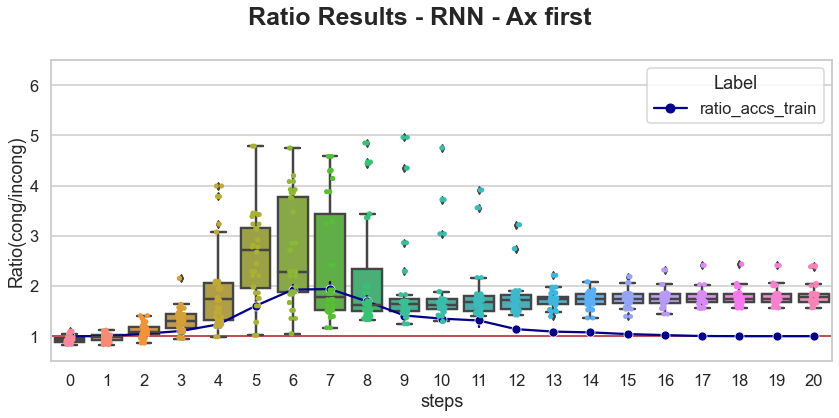

In [197]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'first', 'ctxF', 'RNN', 'rnn', ''
run_res, val_res = rnn_acc_runs_ctxF, ratio_hidds_rnn_ctxF
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


runs, checkpoints:  20 21


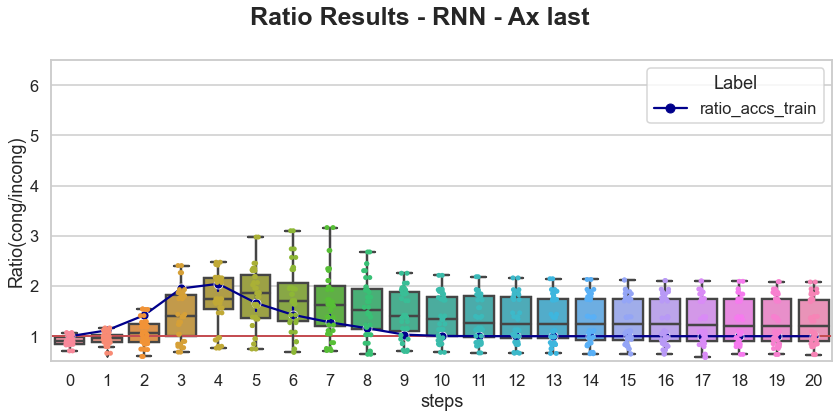

In [198]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'last', 'ctxL', 'RNN', 'rnn', ''
run_res, val_res = mlp_acc_runs, ratio_hidds_mlp
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


# Lesioned RNN

runs, checkpoints:  20 21


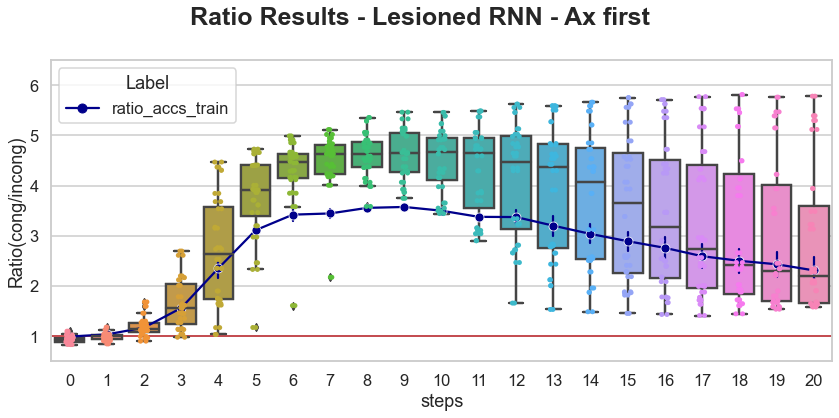

In [210]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'first', 'ctxF', 'Lesioned RNN', 'rnnlesion0.1', ''
run_res, val_res = rnnlesion_acc_runs_ctxF, ratio_hidds_rnnlesion_ctxF
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


/Users/maryam/opt/anaconda3/envs/csls/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


runs, checkpoints:  20 21


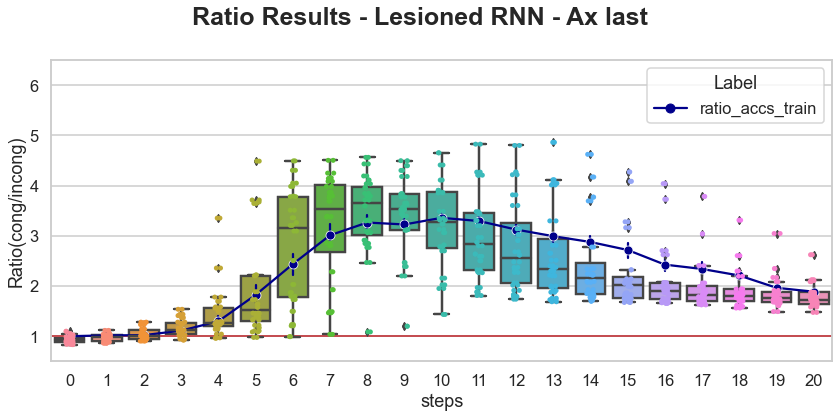

In [211]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'last', 'ctxL', 'Lesioned RNN', 'rnnlesion0.1', ''
run_res, val_res = rnnlesion_acc_runs_ctxL, ratio_hidds_rnnlesion_ctxL
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


# MLP

runs, checkpoints:  20 21


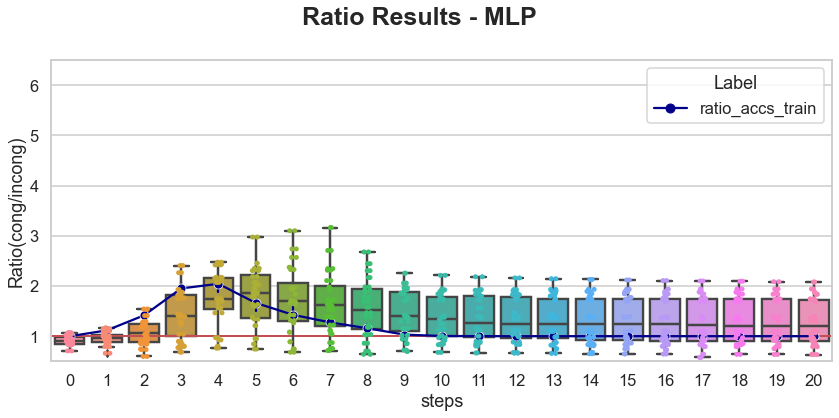

In [212]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = None, None, 'MLP', 'mlp', ''
run_res, val_res = mlp_acc_runs, ratio_hidds_mlp
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


# Lesioned MLP

runs, checkpoints:  20 21


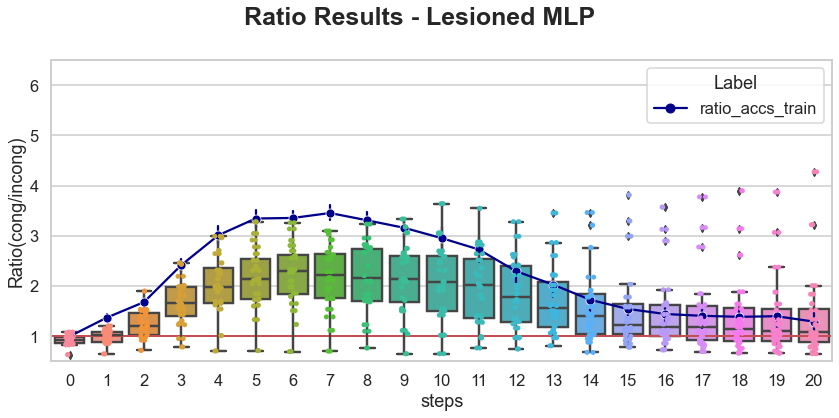

In [220]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = None, None, 'Lesioned MLP', 'mlplesion0.1', ''
run_res, val_res = mlplesion_acc_runs, ratio_hidds_mlplesion
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


# Stepwise MLP

runs, checkpoints:  20 21
runs, checkpoints:  20 21


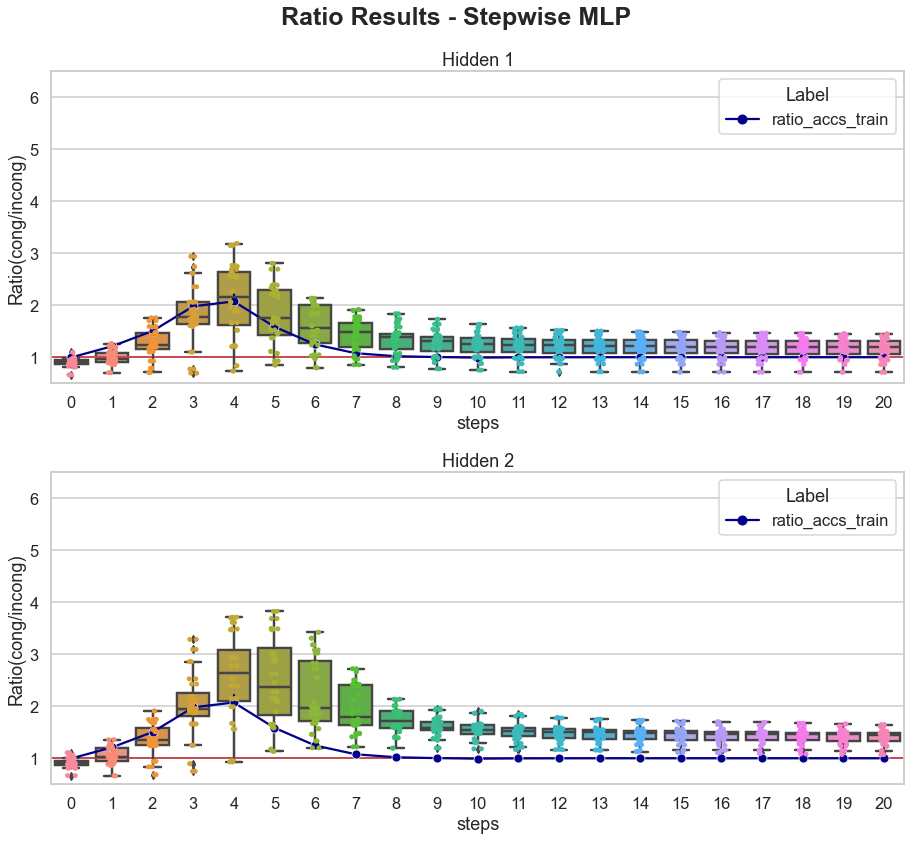

In [209]:
fig, axs = plt.subplots(2, 1, figsize=(13,12))

run_res = swmlp_acc_runs
is_bar_plot, is_accs_plot = True, True
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = None, None, 'Stepwise MLP', 'swmlp', ''

sub_title  = 'Hidden 1'
val_res = ratio_hidds_swmlp[:,:,0] 
ax = axs[0]
dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)

sub_title  = 'Hidden 2'
val_res = ratio_hidds_swmlp[:,:,1] 
ax = axs[1]
dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)



# Cognitive Controller

runs, checkpoints:  20 21


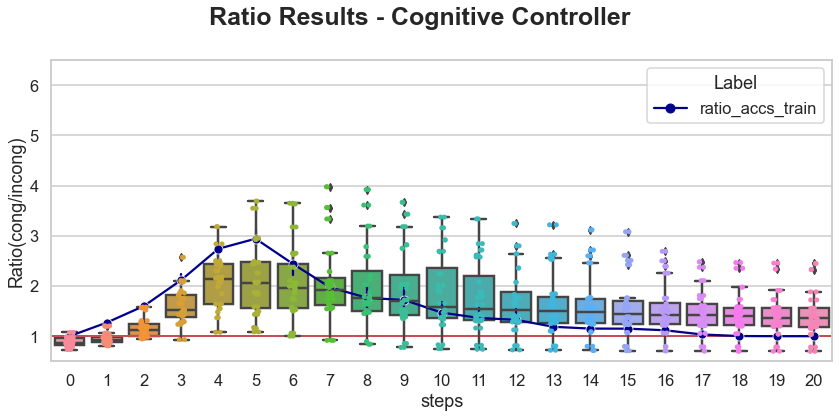

In [202]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = None, None, 'Cognitive Controller', 'mlpcc', ''
run_res, val_res = mlpcc_acc_runs, ratio_hidds_mlpcc
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


# RNNCell 

runs, checkpoints:  20 31


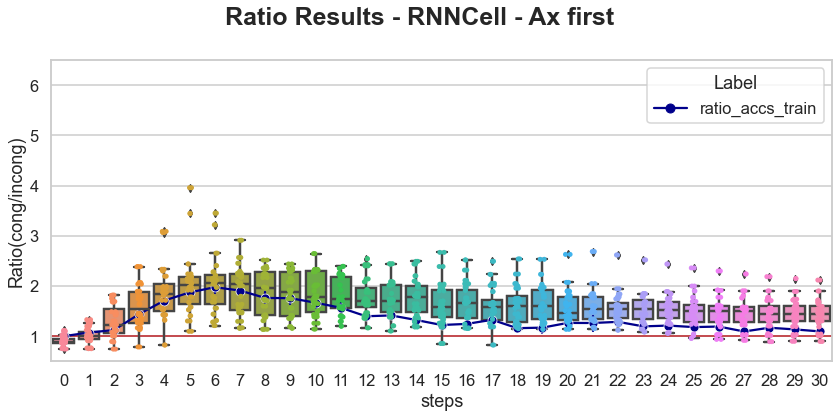

In [203]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'first', 'ctxF', 'RNNCell', 'rnncell', ''
run_res, val_res = rnncell_acc_runs_ctxF, ratio_hidds_rnncell_ctxF
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


runs, checkpoints:  20 31


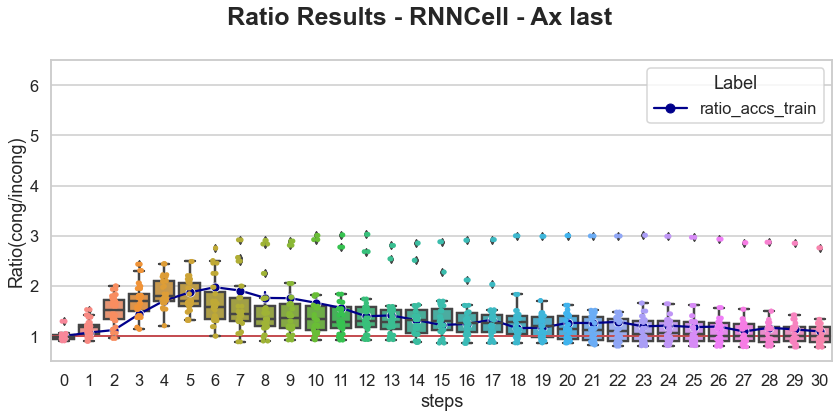

In [204]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'last', 'ctxL', 'RNNCell', 'rnncell', ''
run_res, val_res = rnncell_acc_runs_ctxL, ratio_hidds_rnncell_ctxL
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


# RNN Balanced

runs, checkpoints:  20 21


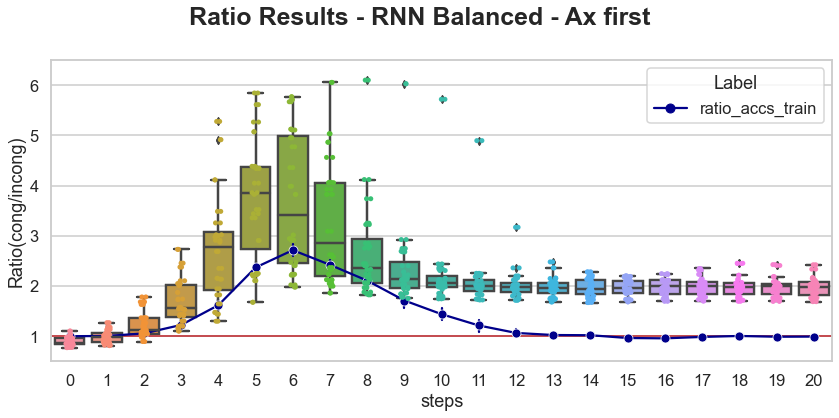

In [205]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'first', 'ctxF', 'RNN Balanced', 'rnnbalanced', ''
run_res, val_res = rnnb_acc_runs_ctxF, ratio_hidds_rnnb_ctxF
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


runs, checkpoints:  20 21


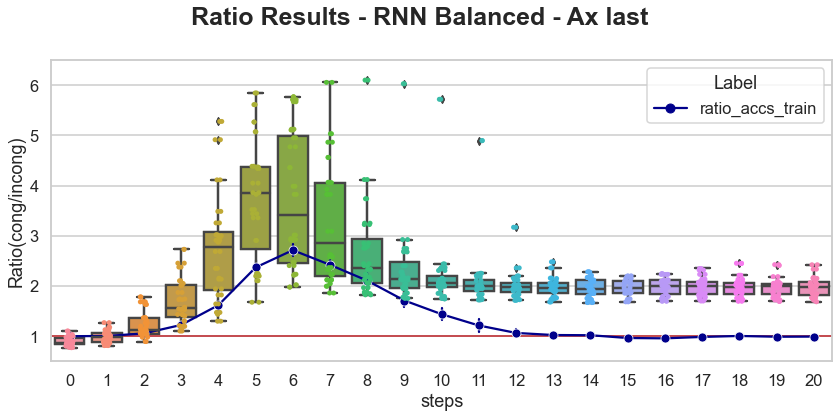

In [206]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'last', 'ctxL', 'RNN Balanced', 'rnnbalanced', ''
run_res, val_res = rnnb_acc_runs_ctxF, ratio_hidds_rnnb_ctxF
is_bar_plot, is_accs_plot = True, True

dfs = runs_to_df(run_res, val_res)
plot_ratio(ctx_order, ctx_order_str, val_res, model_str, mfig_str, sub_title, ax)
plot_ratio_accs(dfs, ctx_order, ctx_order_str, is_bar_plot, is_accs_plot, model_str, mfig_str, sub_title, ax)


# Subplots - multiple models

## RNN and MLP

ValueError: Shape of passed values is (20, 21), indices imply (20, 31)

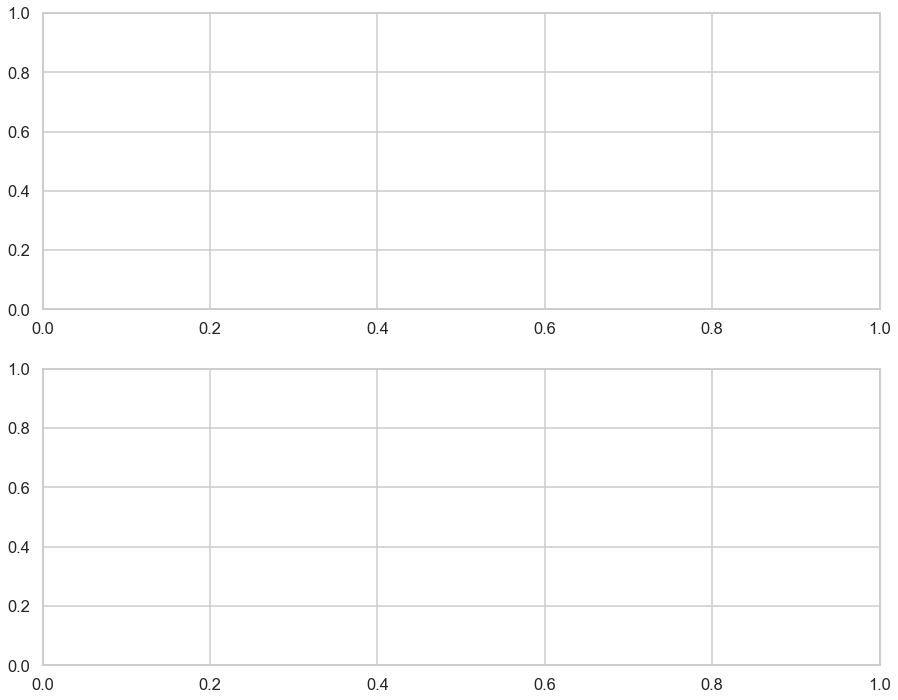

In [100]:
fig, axs = plt.subplots(2, 1, figsize=(figx,figy))gy))
val_name = 'ratio(cong/incong)'
threshold = 1
# MLP
val = ratio_hidds_mlp
runs, checkpoints = val_res.shape[0], val_res.shape[1]
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('MLP')

# RNN
val = ratio_hidds_rnn
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNN - Ax %s' %(ctx_order))

for ax in axs:
    ax.axhline(y=threshold, color='r', linewidth=2)
    ax.set_ylim([mi,mx])

fig.suptitle('Ratio Results ', fontweight='bold')
plt.tight_layout()
fig_str = '%s_ratio_results_both_models_hidds' %(ctx_order_str)
fig.savefig(('../../figures/' + fig_str + '.jpg'), 
        bbox_inches = 'tight', pad_inches = 0)


## Inlcuding Stepwise MLP

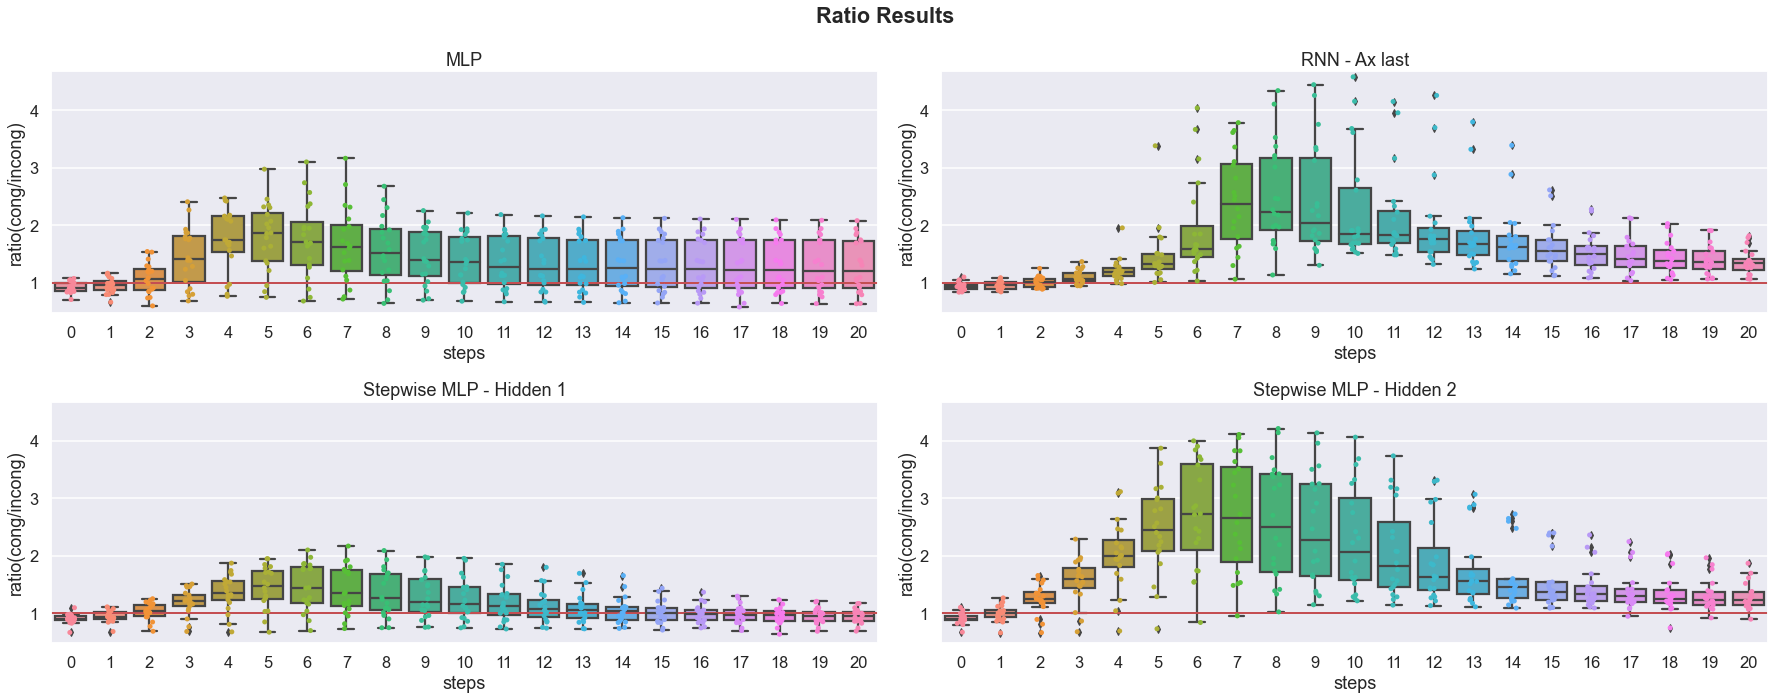

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(25,10))
val_name = 'ratio(cong/incong)'
threshold = 1
# MLP
val = ratio_hidds_mlp
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0][0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('MLP')

# RNN
val = ratio_hidds_rnn
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0][1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNN - Ax %s' %(ctx_order))

# MLP
# Hidden 1
val = ratio_hidds_swmlp[:,:,0]
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1][0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('Stepwise MLP - Hidden 1')

# MLP
# Hidden 2
val = ratio_hidds_swmlp[:,:,1]
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1][1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('Stepwise MLP - Hidden 2')
for ax in axs.flatten():
    ax.axhline(y=threshold, color='r', linewidth=2)
    ax.set_ylim([mi,mx])

fig.suptitle('Ratio Results ', fontweight='bold')
plt.tight_layout()
fig_str = '%s_ratio_results_three_models_hidds' %(ctx_order_str)
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
        bbox_inches = 'tight', pad_inches = 0)